In [1]:
# Imports (External)
import numpy as np
import pandas as pd
import datetime as dt
import xlrd
import xlsxwriter
from collections import OrderedDict

import sys
sys.path.append('../')  

# Visualization/plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt

import pywt
from pywt import wavedec, waverec
from scipy import signal
from statsmodels.robust import mad

# Internal Imports
from wsae_lstm.utils import dictmap_load, pickle_load

In [2]:
#dict_dataframes_index = dictmap_load(path = "../data/interim/clean_data_index.xlsx")   
#dict_dataframes_index['csi300 index data'].info()
# data = dict_dataframes_index['csi300 index data'].drop(['date'],axis=1,inplace=True)
# data = dict_dataframes_index['csi300 index data']
# data.head(2)

In [3]:
dict_dataframes_index=pickle_load(path_filename="../data/interim/cdii_tvt_split.pickle")
dict_dataframes_index.keys()

dict_keys(['csi300 index data', 'nifty 50 index data', 'hangseng index data', 'nikkei 225 index data', 's&p500 index data', 'djia index data'])

In [4]:
# [index data][period 1-24][train/validate/test]
    # Train [1], Validate [2], Test [3]
dict_dataframes_index['csi300 index data'][1][1].head(2)

,open,high,low,close,volume,us dollar index,shibor,macd,cci,atr,boll,ema20,ma10,mtm6,ma5,mtm12,roc,smi,wvad
date,,,,,,,,,,,,,,,,,,,
2008-07-01,2799.20,2809.38,2690.18,2698.35,288515.85,72.34,2.5006,-213.078565,-128.949052,119.200,3173.475692,3033.748201,2851.2504,-91.594,2851.3262,-280.770,-9.424605,-0.097927,-8.726278e+07
2008-07-02,2702.63,2745.94,2670.06,2699.60,279163.65,71.99,2.7238,-213.732249,-139.719688,75.875,3140.413385,3001.924277,2822.0828,-152.318,2797.3382,-252.645,-8.557733,-0.026497,-1.095493e+08


In [5]:
len(dict_dataframes_index['csi300 index data'][1][1])

489

In [6]:
len(dict_dataframes_index['csi300 index data'][1][1].columns)

19

In [7]:
data = dict_dataframes_index['csi300 index data'][1][1]

In [8]:
data.shape[1]

19

In [9]:
# Multi-level wavelet transform
    # https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html#pywt.wavedec
w = pywt.Wavelet('haar')
coeffs = wavedec(data, w, level=2,axis=0)
cA2, cD2, cD1 = coeffs
# cA = Approximation coefficients
    # Approximation (low pass)
# cD = Detail coefficient(s)
    # Detail (high pass)
    # Detail cofficients represent the high freq part of the signal  

In [10]:
print(len(cA2),len(cD2),len(cD1))

123 123 245


In [11]:
pd.DataFrame(cA2).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,5453.76,5573.425,5346.76,5450.205,701666.325,144.885,5.1819,-417.255691,-231.389668,226.662,6248.020462,5985.488387,5652.11220,-345.946,5570.1945,-432.450,-14.603742,-0.086456,-1.650223e+08
1,5773.08,5951.155,5732.94,5886.730,1189933.120,145.375,5.0683,-303.833331,193.673349,233.669,6015.778269,5899.670469,5650.36285,383.837,5658.7340,254.429,9.064430,0.026143,3.165430e+07


In [12]:
pd.DataFrame(cD1).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,68.285302,44.858854,14.226988,-0.883883,6613.004039,0.247487,-0.157826,0.462224,7.615990,30.635401,23.378582,22.502912,20.624608,42.938352,38.175281,-19.887378,-0.612971,-0.050508,1.575896e+07
1,-68.398439,16.850355,-69.833866,13.265323,54838.216846,0.014142,0.009192,-4.371506,-21.294887,86.690584,25.411732,15.966482,7.623742,21.305127,10.489081,118.339270,3.854745,-0.009910,1.139691e+07


In [13]:
pd.DataFrame(cD2).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,48.07,-18.105,13.48,-52.255,-133986.825,-0.555,0.0425,-9.555123,-37.279072,-31.587,65.868615,50.184091,21.22100,102.034,78.4699,-100.965,-3.378596,-0.037968,-3.178985e+07
1,-124.90,-121.025,-144.26,-102.130,-120132.100,0.295,0.0497,-42.945891,-86.354396,13.534,49.447538,-5.489996,-6.69625,-207.073,-104.7668,-92.569,-3.278158,-0.038239,-9.512131e+07


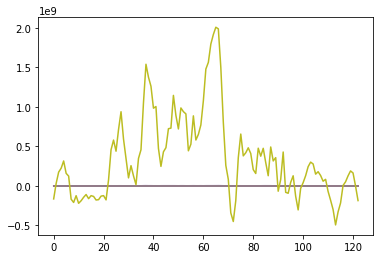

In [14]:
plt.plot(cA2);

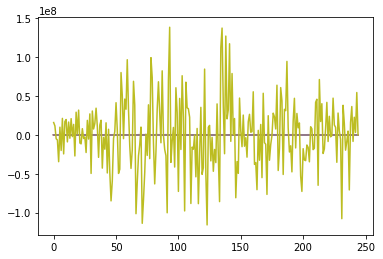

In [15]:
plt.plot(cD1);

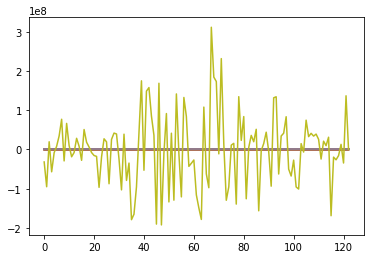

In [16]:
plt.plot(cD2);

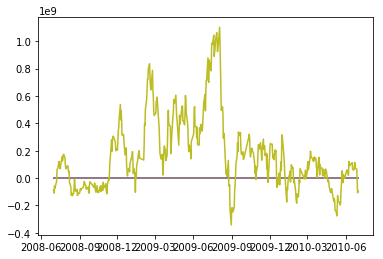

In [17]:
plt.plot(data);

In [18]:
reconstructed_signal = pywt.waverec(coeffs, 'haar',axis=0)
len(reconstructed_signal)

490

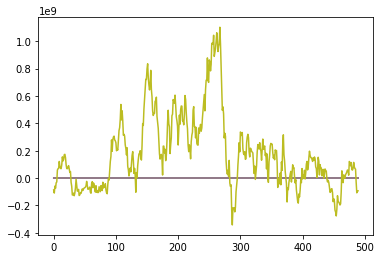

In [19]:
#plt.plot(data)
plt.plot(reconstructed_signal);

In [20]:
pd.DataFrame(reconstructed_signal).head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2799.2,2809.38,2690.18,2698.35,288515.85,72.34,2.5006,-213.078565,-128.949052,119.2,3173.475692,3033.748201,2851.2504,-91.594,2851.3262,-280.77,-9.424605,-0.097927,-8.726278e+07


In [21]:
data.head(1)

,open,high,low,close,volume,us dollar index,shibor,macd,cci,atr,boll,ema20,ma10,mtm6,ma5,mtm12,roc,smi,wvad
date,,,,,,,,,,,,,,,,,,,
2008-07-01,2799.2,2809.38,2690.18,2698.35,288515.85,72.34,2.5006,-213.078565,-128.949052,119.2,3173.475692,3033.748201,2851.2504,-91.594,2851.3262,-280.77,-9.424605,-0.097927,-8.726278e+07


In [33]:
# http://connor-johnson.com/2016/01/24/using-pywavelets-to-remove-high-frequency-noise/
def waveletSmooth( x, wavelet="haar", level=1, declevel=3):
    # calculate the wavelet coefficients
    coeff = pywt.wavedec( x, wavelet, mode="per",level=declevel,axis=0 )
    # calculate a threshold
    sigma = mad(coeff[-level])
    uthresh = sigma * np.sqrt( 2*np.log( len( x ) ) )
    coeff[1:] = ( pywt.threshold( i, value=uthresh, mode="soft" ) for i in coeff[1:] )
    # reconstruct the signal using the thresholded coefficients
    y = pywt.waverec( coeff, wavelet, mode="per",axis=0 )
#     f, ax = plt.subplots(figsize=(8,6))
#     plt.plot( x, color="b", alpha=0.5)
#     plt.plot( y, color="r")
#     ax.set_xlim((0,len(y)))
    return y

In [34]:
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = OrderedDict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())

In [35]:
len(waveletSmooth(data))

490

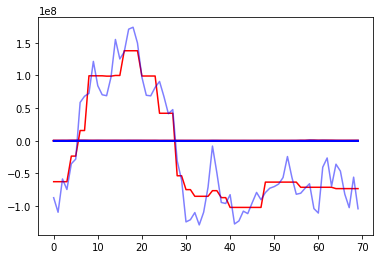

In [64]:
plt.plot(waveletSmooth(data[:70].values),'r');
plt.plot(data[:70].values,'b',alpha=0.5);

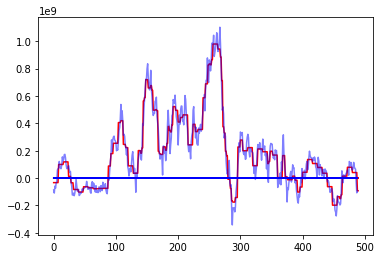

In [66]:
denoised_data = waveletSmooth(data.values);
plt.plot(denoised_data,'r');
plt.plot(data.values,'b',alpha=0.5);

In [ ]:
denoised_data = waveletSmooth(data);

In [90]:
# print(w)
# w.filter_bank == (w.dec_lo, w.dec_hi, w.rec_lo, w.rec_hi)
# print(w.filter_bank)
# # https://pywavelets.readthedocs.io/en/latest/ref/other-functions.html#pywt.orthogonal_filter_bank
# #print(pywt.orthogonal_filter_bank([2,2]))